Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

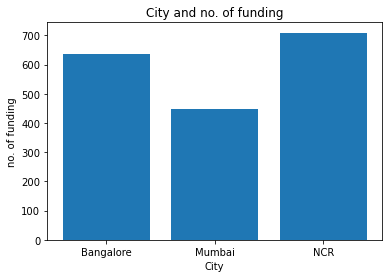

In [7]:

import numpy as np
import csv
import matplotlib.pyplot as plt
with open('startup_funding.csv') as file_obj:
    file_data=csv.DictReader(file_obj,skipinitialspace=True)
    city=[]
    for row in file_data:
        city.append(row['CityLocation'])
    n_city=np.array(city)
    n_city=n_city[n_city!='']

    for i in range(len(n_city)):
        if 'bangalore' in n_city[i]:
            n_city[i] = 'Bangalore'
        if n_city[i] == 'Delhi' or n_city[i]=='New Delhi' or n_city[i]=='Gurgaon' or n_city[i]=='Noida':
            n_city[i] = 'NCR'

    for i in range(len(n_city)):
        temp = ' '.join(n_city[i].split('/'))
        if 'bangalore' in temp or 'Bangalore' in temp:
            n_city[i]='Bangalore'

        if 'Delhi' in temp or 'New Delhi' in temp or 'Gurgaon' in temp or 'Noida' in temp:
            n_city[i]= 'NCR'
        if 'Mumbai' in temp:
            n_city[i]='Mumbai'

    n_city = n_city[(n_city=='Mumbai') | (n_city=='NCR') | (n_city=='Bangalore')]
    d={}

    for ele in n_city:
        d[ele]=d.get(ele,0) + 1
    city = []
    n_funding = []
    for  ele in d:
        city.append(ele)
        n_funding.append(d[ele])

    plt.bar(city,n_funding)
    plt.title('City and no. of funding')
    plt.xlabel('City')
    plt.ylabel('no. of funding')
    plt.show()



Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors

In [8]:
# Open and read data file as specified in the question
# Print the required output in given format
import csv
import operator

with open('startup_funding.csv') as file_obj:
    file_data = csv.DictReader(file_obj, skipinitialspace=True)
    investors = []
    for row in file_data:
        if not ('Undisclosed' in row['InvestorsName'] or 'undisclosed' in row['InvestorsName']):
            for i in row['InvestorsName'].split(','):
                investors.append(i.strip())

    dic = dict()
    for i in investors:
        if i in dic.keys():
            dic[i] += 1
        else:
            dic[i] = 1
    dic.pop('')
    n_investor=[]
    n_time=[]
    for ele in dic:
        n_investor.append(ele)
        n_time.append(dic[ele])

    sorted_dic =dict(sorted(dic.items(),key=operator.itemgetter(1),reverse=True))
    a=1
    for ele in sorted_dic:
        if a==6:
            break
        print(ele,sorted_dic[ele])
        a+=1

Sequoia Capital 64
Accel Partners 51
Kalaari Capital 44
Indian Angel Network 40
SAIF Partners 40


In [9]:
# Open and read data file as specified in the question
# Print the required output in given format
import csv
import operator

with open('startup_funding.csv') as file_obj:
    file_data = csv.DictReader(file_obj, skipinitialspace=True)
    startup=[]
    investor_name=[]
    for row in file_data:

        if not ('Undisclosed' in row['InvestorsName'] or 'undisclosed' in row['InvestorsName']):
            for i in row['InvestorsName'].split(','):
                investor_name.append(i.strip())
                startup.append(row['StartupName'])
    for i in range(len(startup)):
        if startup[i]=='Olacabs' or startup[i]=='Ola Cabs':
            startup[i]= 'Ola'
        if startup[i] == 'Flipkart.com' :
            startup[i]= 'Flipkart'
        if startup[i]=='Oyo'  or startup[i]=='Oyo Rooms' or startup[i]=='Oyorooms' :
            startup[i]= 'Oyo'
        if startup[i]=='Paytm Marketplace':
            startup[i]= 'Paytm'

    final_1=[]
    for ele in range(len(startup)):
        if startup[ele]=='' or investor_name[ele]=='':
            continue
        else:
            final_1.append(investor_name[ele]+'*'+startup[ele])

    final_2=[]
    for ele in final_1:
        if ele not in final_2:
            final_2.append(ele)
    for ele in range(len(final_2)):
        final_2[ele]=final_2[ele].split('*')[0].strip()
    d={}
    for ele in final_2:
        d[ele]=d.get(ele,0) + 1
    d = dict(sorted(d.items(),key=operator.itemgetter(1),reverse=True))
    a=1
    for ele in d:
        if a==6:
            break
        print(ele,d[ele])
        a+=1

Sequoia Capital 49
Accel Partners 46
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [10]:
# Open and read data file as specified in the question
# Print the required output in given format
import csv
import operator

with open('startup_funding.csv') as file_obj:
    file_data = csv.DictReader(file_obj, skipinitialspace=True)
    startup=[]
    investor_name=[]
    investment_type=[]
    for row in file_data:
        investment_type.append(row['InvestmentType'])

        if not ('Undisclosed' in row['InvestorsName'] or 'undisclosed' in row['InvestorsName']):
            for i in row['InvestorsName'].split(','):
                investor_name.append(i.strip())
                startup.append(row['StartupName'])

    for i in range(len(startup)):
        if startup[i]=='Olacabs' or startup[i]=='Ola Cabs':
            startup[i]= 'Ola'
        if startup[i] == 'Flipkart.com' :
            startup[i]= 'Flipkart'
        if startup[i]=='Oyo'  or startup[i]=='Oyo Rooms' or startup[i]=='Oyorooms' :
            startup[i]= 'Oyo'
        if startup[i]=='Paytm Marketplace':
            startup[i]= 'Paytm'

    for ele in range(len(investment_type)):
        if investment_type[ele]=='SeedFunding':
            investment_type[ele]='Seed Funding'
        if investment_type[ele]=='Crowd funding':
            investment_type[ele]='Crowd Funding'


    final_1=[]
    for ele in range(len(investment_type)):
        if investment_type[ele]=='Seed Funding' or investment_type[ele]=='Crowd Funding':
            if startup[ele]=='' or investor_name[ele]=='':
                continue
            else:
                final_1.append(investor_name[ele]+'*'+startup[ele])

    final_2=[]
    for ele in final_1:
        if ele not in final_2:
            final_2.append(ele)
    for ele in range(len(final_2)):
        final_2[ele]=final_2[ele].split('*')[0].strip()
    d={}
    for ele in final_2:
        d[ele]=d.get(ele,0) + 1
    d = dict(sorted(d.items(),key=operator.itemgetter(1),reverse=True))
    a=1
    for ele in d:
        if a==6:
            break
        print(ele,d[ele])
        a+=1




Indian Angel Network 17
Blume Ventures 14
Kalaari Capital 14
Sequoia Capital 12
Accel Partners 10


Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm

In [11]:
# Open and read data file as specified in the question
# Print the required output in given format
import csv
import operator

with open('startup_funding.csv') as file_obj:
    file_data = csv.DictReader(file_obj, skipinitialspace=True)
    startup=[]
    investor_name=[]
    investment_type=[]
    for row in file_data:
        investment_type.append(row['InvestmentType'])

        if not ('Undisclosed' in row['InvestorsName'] or 'undisclosed' in row['InvestorsName']):
            for i in row['InvestorsName'].split(','):
                investor_name.append(i.strip())
                startup.append(row['StartupName'])

    for i in range(len(startup)):
        if startup[i]=='Olacabs' or startup[i]=='Ola Cabs':
            startup[i]= 'Ola'
        if startup[i] == 'Flipkart.com' :
            startup[i]= 'Flipkart'
        if startup[i]=='Oyo'  or startup[i]=='Oyo Rooms' or startup[i]=='Oyorooms' :
            startup[i]= 'Oyo'
        if startup[i]=='Paytm Marketplace':
            startup[i]= 'Paytm'

    for ele in range(len(investment_type)):
        if investment_type[ele]=='PrivateEquity':
            investment_type[ele]='Private Equity'

    final_1=[]
    for ele in range(len(investment_type)):
        if investment_type[ele]=='Private Equity':
            if startup[ele]=='' or investor_name[ele]=='':
                continue
            else:
                final_1.append(investor_name[ele]+'*'+startup[ele])

    final_2=[]
    for ele in final_1:
        if ele not in final_2:
            final_2.append(ele)
    for ele in range(len(final_2)):
        final_2[ele]=final_2[ele].split('*')[0].strip()
    d={}
    for ele in final_2:
        d[ele]=d.get(ele,0) + 1
    d = dict(sorted(d.items(),key=operator.itemgetter(1),reverse=True))
    a=1
    for ele in d:
        if a==6:
            break
        print(ele,d[ele])
        a+=1

Accel Partners 13
Indian Angel Network 11
Blume Ventures 11
Kalaari Capital 9
SAIF Partners 9
